In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


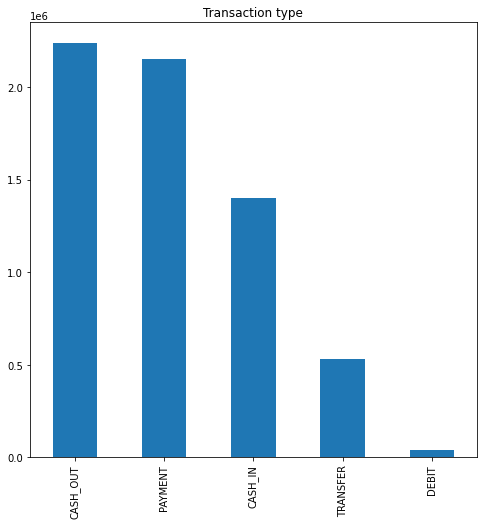

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
df.type.value_counts().plot(kind='bar', title='Type', ax=ax, figsize=(8, 8))
plt.show()

97.94697781731425


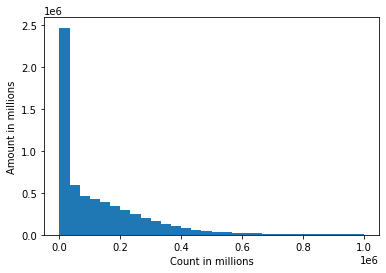

In [ ]:
plt.hist(df['amount'][df['amount'] < 1000000], density=False, bins=30)
plt.ylabel('Amount in millions')
plt.xlabel('Count in millions')

print(len(df['amount'][df['amount'] <= 1000000]) * 100 / len(df))

(array([475504., 439083., 371416., 300201., 237458., 186016., 149061.,
        122058., 102978.,  89049.,  78846.,  70891.,  65306.,  60641.,
         57437.,  54623.,  52875.,  51350.,  49860.,  48711.,  48494.,
         47526.,  46989.,  46529.,  46213.,  46018.,  45496.,  45231.,
         45070.,  44326.]),
 array([    0.   ,  3333.327,  6666.654,  9999.981, 13333.308, 16666.635,
        19999.962, 23333.289, 26666.616, 29999.943, 33333.27 , 36666.597,
        39999.924, 43333.251, 46666.578, 49999.905, 53333.232, 56666.559,
        59999.886, 63333.213, 66666.54 , 69999.867, 73333.194, 76666.521,
        79999.848, 83333.175, 86666.502, 89999.829, 93333.156, 96666.483,
        99999.81 ]),
 <a list of 30 Patch objects>)

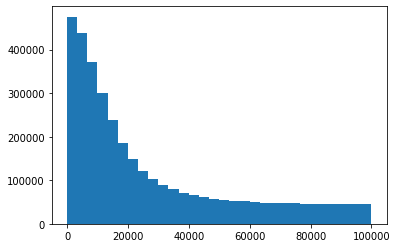

In [ ]:
plt.hist(df['amount'][df['amount'] < 100000], density=False, bins=30)
plt.ylabel('Amount')
plt.xlabel('Count')

In [ ]:
print(df['isFraud'].value_counts())
print("Percentage fraud", len(df[df['isFraud'] == 1]) * 100 / len(df))

0    6354407
1       8213
Name: isFraud, dtype: int64
Percentage fraud 0.12908204481801522


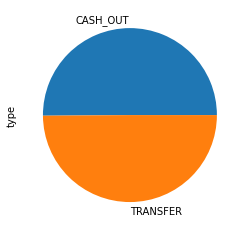

In [ ]:
df[df['isFraud'] == 1]['type'].value_counts().plot(kind='pie')

In [ ]:
print(len(df[df['isFlaggedFraud'] == 1]))
print(len(df[(df['isFlaggedFraud'] == 0) & (df['isFraud'] == 1)]) * 100 / len(df[df['isFraud'] == 1]))
print(len(df[df['isFraud'] == 1]))

16
99.80518689881895
8213


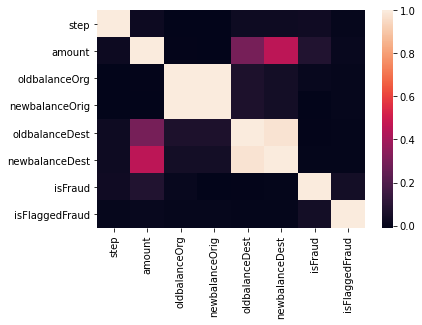

In [ ]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
print(df[df['type'] == 'TRANSFER']['oldbalanceDest'] + df[df['type'] == 'TRANSFER']['amount'])
print(df[df['type'] == 'TRANSFER']['newbalanceDest'])

2              181.00
19          237735.30
24          317952.89
58           63127.80
78          100614.05
              ...    
6362610      63416.99
6362612    1258818.82
6362614     339682.13
6362616    6311409.28
6362618     850002.52
Length: 532909, dtype: float64
2                0.00
19               0.00
24         2719172.89
58            8383.29
78           24044.18
              ...    
6362610          0.00
6362612          0.00
6362614          0.00
6362616          0.00
6362618          0.00
Name: newbalanceDest, Length: 532909, dtype: float64


In [ ]:
# Balance transfer is correct for how many rows
df[(df['oldbalanceOrg'] + df['amount'] == df['newbalanceOrig']) & (df['oldbalanceDest'] + df['amount'] == df['newbalanceDest'])]
# None of the rows have sum matching!

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0,C1510987794,0.0,0.0,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.0,C521393327,0.0,0.0,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.0,C539112012,0.0,0.0,C1106468520,538547.63,538547.63,1,0
5563714,387,CASH_OUT,0.0,C1294472700,0.0,0.0,C1325541393,7970766.57,7970766.57,1,0
5996408,425,CASH_OUT,0.0,C832555372,0.0,0.0,C1462759334,76759.90,76759.90,1,0
5996410,425,CASH_OUT,0.0,C69493310,0.0,0.0,C719711728,2921531.34,2921531.34,1,0
6168500,554,CASH_OUT,0.0,C10965156,0.0,0.0,C1493336195,230289.66,230289.66,1,0
6205440,586,CASH_OUT,0.0,C1303719003,0.0,0.0,C900608348,1328472.86,1328472.86,1,0
6266414,617,CASH_OUT,0.0,C1971175979,0.0,0.0,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.0,C2060908932,0.0,0.0,C1587892888,0.00,0.00,1,0


In [ ]:
# Actual classification

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df2 = pd.concat([df, pd.get_dummies(df['type'])], axis=1)
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [ ]:
train_cols = df2.columns.to_list()
train_cols.remove('isFraud')
train_cols.remove('isFlaggedFraud')
train_cols.remove('nameOrig')
train_cols.remove('nameDest')
train_cols.remove('type')
train_cols

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'CASH_IN',
 'CASH_OUT',
 'DEBIT',
 'PAYMENT',
 'TRANSFER']

In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
train_index, test_index = next(sss.split(df2[train_cols], df2['isFraud']))
train_X = df2[train_cols][df2.index.isin(train_index)]
train_y = df2['isFraud'][df2.index.isin(train_index)]
test_X = df2[train_cols][df2.index.isin(test_index)]
test_y = df2['isFraud'][df2.index.isin(test_index)]

In [ ]:
import random
random.seed(0)
undersample = (train_y == 1) | (train_y.index.isin(set([random.randint(0, 6362620) for _ in range(1000000)])))
train_X = train_X[undersample]
train_y = train_y[undersample]

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

def print_metrics(preds):
    print("Total fradulent predictions", preds.sum(), "vs actual", test_y.sum())
    print("AUC score", metrics.roc_auc_score(test_y, preds))
    print(confusion_matrix(test_y, preds))
    print("Accuracy", accuracy_score(test_y, preds))

In [ ]:
# All non-fraudulent
print_metrics(np.array([0]*len(test_y)))

Total fradulent predictions 0 vs actual 2053
AUC score 0.5
[[1588602       0]
 [   2053       0]]
Accuracy 0.9987093367197789


In [ ]:
# All fraudulent
print_metrics(np.array([1]*len(test_y)))

Total fradulent predictions 1590655 vs actual 2053
AUC score 0.5
[[      0 1588602]
 [      0    2053]]
Accuracy 0.001290663280221041


In [ ]:
model = XGBClassifier(max_depth=5, n_jobs=4)
model.fit(train_X, train_y)
xgb_preds = model.predict(test_X)
print_metrics(xgb_preds)

Total fradulent predictions 2042 vs actual 2053
AUC score 0.9346487751753801
[[1588345     257]
 [    268    1785]]
0.9996699472858666


In [ ]:
clf = SVC(gamma='auto')
clf.fit(train_X, train_y)
# Too slow; doesnt train

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(train_X, train_y)
dt_preds = clf.predict(test_X)
print_metrics(dt_preds)

Total fradulent predictions 2749 vs actual 2053
AUC score 0.963201823615923
[[1587756     846]
 [    150    1903]]
Accuracy 0.999373842850901


In [ ]:
clf = LogisticRegression(random_state=0).fit(train_X, train_y)
lr_preds = clf.predict(test_X)
print_metrics(lr_preds)

Total fradulent predictions 7714 vs actual 2053
AUC score 0.7865470943261871
[[1582073    6529]
 [    868    1185]]
Accuracy 0.9953497144258183


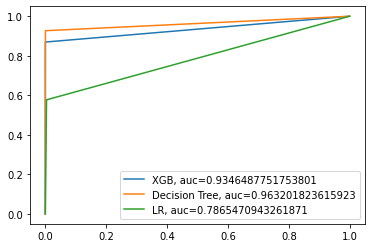

In [ ]:
fpr, tpr, _ = metrics.roc_curve(test_y,  xgb_preds)
auc = metrics.roc_auc_score(test_y, xgb_preds)
plt.plot(fpr,tpr,label="XGB, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(test_y,  dt_preds)
auc = metrics.roc_auc_score(test_y, dt_preds)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

fpr, tpr, _ = metrics.roc_curve(test_y,  lr_preds)
auc = metrics.roc_auc_score(test_y, lr_preds)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.legend(loc=4)

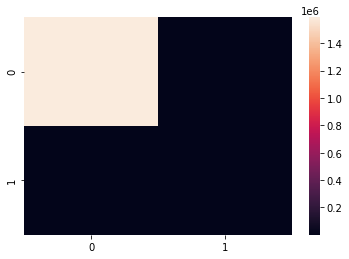

In [ ]:
corr = confusion_matrix(test_y, xgb_preds)
sns.heatmap(corr)